<a href="https://colab.research.google.com/github/rahayuisna23/data_analytics_portofolio/blob/main/Cluster_Analysis_of_East_Asian_Tourism_Destination_Reviews_on_TripAdvisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis Cluster Pada Data Ulasan Destinasi Pariwisata Asia Timur di Situs TripAdvisor**

Tujuan dari analisis ini yaitu untuk mengelompokkan user berdasarkan kategori-kategori destinasi dengan menggunakan metode K-Means dan K-Medoids serta membandingkan hasil clustering dari kedua metode tersebut. Hasil analisis ini diharapkan dapat menambah wawasan dan pengetahuan terkait destinasi pariwisata yang akan dikunjungi serta dapat menjadi bahan pertimbangan bagi wisatawan maupun pengelola wisata.

Data yang digunakan terdiri dari 980 observasi dan 11 variabel. Variabel-variabel yang digunakan adalah sebagai berikut:
1.   User_ID    : User ID
2.   Category_1 : Rata-rata feedback User pada Art Galleries
1.   Category_2 : Rata-rata feedback User pada Dance Clubs
2.   Category_3 : Rata-rata feedback User pada Juice Bars
1.   Category_4 : Rata-rata feedback User pada Restaurants
2.   Category_5 : Rata-rata feedback User pada Museums
1.   Category_6 : Rata-rata feedback User pada Resortsm
2.   Category_7 : Rata-rata feedback User pada Parks/Picnic Spots
1.   Category_8 : Rata-rata feedback User pada Beaches
2.   Category_9 : Rata-rata feedback User pada Theaters
1.   Category_10 : Rata-rata feedback User pada Religious Institutions



In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set(context='talk', palette='hls')
sns.set_theme(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(16,12)})

### Import Data

In [ ]:
dataset=pd.read_csv('tripadvisor_review.csv')
dataset.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,10001,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,10002,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,10003,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,10004,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,10005,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [ ]:
dataset.rename(columns={'Category 1':'Art Galleries','Category 2':'Dance Clubs','Category 3':'Juice Bars','Category 4':'Restaurants','Category 5':'Museums','Category 6':'Resorts','Category 7':'Parks/picnic spots','Category 8':'Beaches','Category 9':'Theaters','Category 10':'Religious institutions',},inplace=True)

In [ ]:
dataset.head()

,User ID,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/picnic spots,Beaches,Theaters,Religious institutions
0,10001,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,10002,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,10003,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,10004,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,10005,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


### Drop Duplicates

In [ ]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
975    False
976    False
977    False
978    False
979    False
Length: 980, dtype: bool

In [ ]:
dataset=dataset.drop_duplicates()

In [ ]:
dataset

,User ID,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/picnic spots,Beaches,Theaters,Religious institutions
0,10001,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,10002,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,10003,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,10004,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,10005,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,10976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,10977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,10978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,10979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


Berdasarkan output yang terlihat bahwa pada pemanggilan data pertama keterangan jumlah data yaitu sebanyak 980 data, pada pemanggilan data kedua setelah dilakukan penghapusan data duplikat agar menjadi data yang unik keterangan jumlah data yaitu sebesar 980. Karena pemanggilan data
sebelum dan setelah penghapusan data sama yaitu 980 maka data yang dimiliki tidak terduplikat atau data yang dimiliki sudah unik.

### Cek Missing Value

In [ ]:
dataset.isna().sum()

User ID                   0
Art Galleries             0
Dance Clubs               0
Juice Bars                0
Restaurants               0
Museums                   0
Resorts                   0
Parks/picnic spots        0
Beaches                   0
Theaters                  0
Religious institutions    0
dtype: int64

Pada pengujian Missing Value secara keseluruhan didapatkan output pada masing masing kategori yaitu 0 yang berarti bahwa tidak ditemukan adanya masing value pada masing-masing kategori.

### Cek Outlier

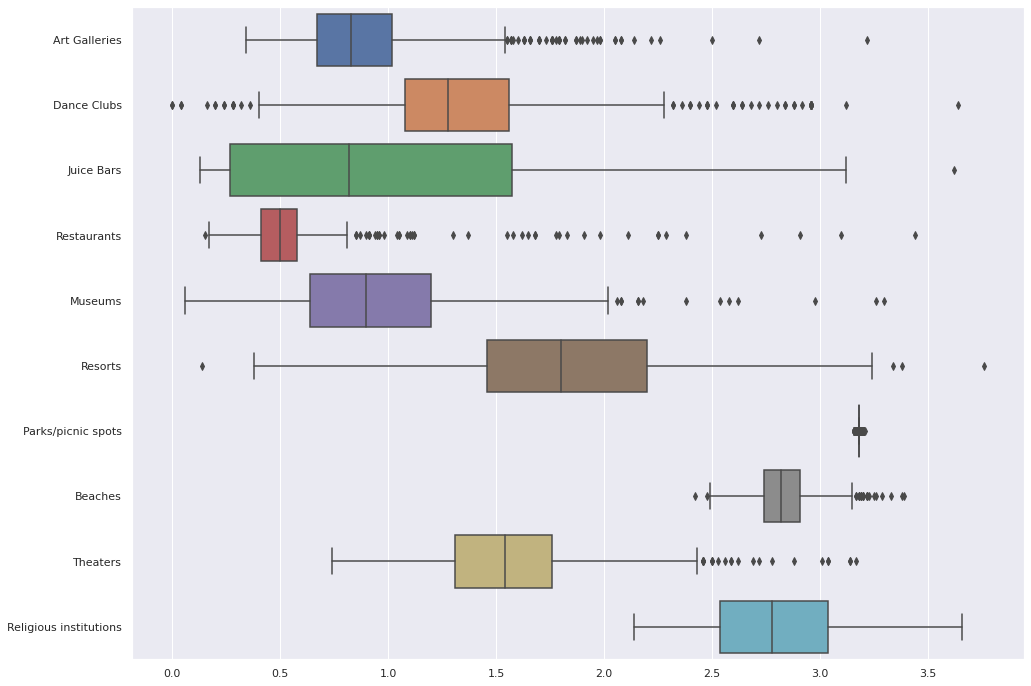

In [ ]:
sns.boxplot(data=dataset[['Art Galleries','Dance Clubs','Juice Bars','Restaurants','Museums','Resorts','Parks/picnic spots','Beaches','Theaters','Religious institutions']], orient='h');

Identifikasi Outlier pada dataset 'tripadvisor_review.csv' dilakukan dengan membuat Boxplot pada masing masing kategori. Output yang dihasilkan terlihat bahwa pada data kategori Religion Institutions tidak ditemukan adanya titik titik diluar boxplot yang berarti bahwa tidak ditemukan adanya outlier pada data kategori Religion Institutions, namun pada data kategori selain kategori Religion Institutions menunjukkan adanya titik titik diluar kotak boxplot sehingga teridentifikasi adanya outlier pada data.


In [ ]:
data_clustering = pd.DataFrame({'User ID':dataset['User ID'],'Art Galleries':dataset['Art Galleries'],'Dance Clubs':dataset['Dance Clubs'],'Juice Bars':dataset['Juice Bars'],'Restaurants':dataset['Restaurants'],'Museums':dataset['Museums'],'Resorts':dataset['Resorts'],'Parks/picnic spots':dataset['Parks/picnic spots'],'Beaches':dataset['Beaches'],'Theaters':dataset['Theaters'],'Religious institutions':dataset['Religious institutions']})

In [ ]:
data_clustering=data_clustering.groupby('User ID').sum()

In [ ]:
data_clustering

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/picnic spots,Beaches,Theaters,Religious institutions
User ID,,,,,,,,,,
10001,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
10002,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
10003,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
10004,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
10005,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
10976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
10977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
10978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02


Didefinisikan data_clustering sebagai dataframe dari dataset yang memiliki total data sebesar 980 data.


### Cek No Multikolinearitas

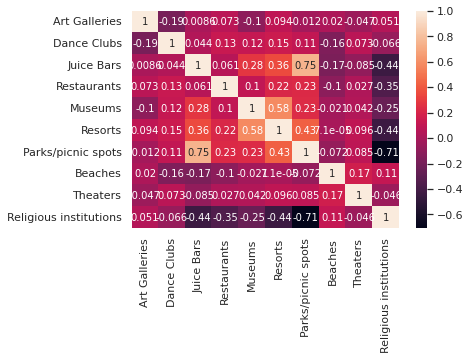

In [ ]:
%matplotlib inline
correlation = data_clustering.corr()
sns.heatmap(correlation,annot=True)

Pada analisis clustering diperlukan adanya uji asumsi multikolinearitas. Pada output yang ditampilkan pada data train didapatkan bahwa mayoritas korelasi antar data < 0,7, namun terdapat korelasi antara kategori juice bars dan kategori park/picnic spots serta kategori juice bars dan kategori Religious institutions yang memiliki nilai korelasi ≥ 0,7 yang masing masing secara berurutan bernilai 0,75 serta 0,71. Karena terdapat 2 korelasi antar data kategori yang memiliki nilai korelasi ≥ 0,7 sehingga dapat dikatakan bahwa asumsi no multikolinearitas tidak terpenuhi

### Menghitung VIF Value

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# the independent variables set
X = dataset[['Art Galleries', 'Dance Clubs', 'Juice Bars', 'Restaurants', 'Museums','Resorts','Parks/picnic spots','Beaches','Theaters','Religious institutions']]

# VIF dataframe
vif_info = pd.DataFrame()
vif_info["fatures"] = X.columns

# calculating VIF for each feature
vif_info["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

print(vif_info)

                  fatures         VIF
0           Art Galleries    9.510295
1             Dance Clubs   10.099982
2              Juice Bars    3.752489
3             Restaurants    5.579521
4                 Museums    8.933049
5                 Resorts   24.526804
6      Parks/picnic spots  646.854951
7                 Beaches  475.220916
8                Theaters   20.812945
9  Religious institutions  120.639574


Untuk mendeteksi adanya multikolinearitas pada data dilakukan pengujian nilai VIF. Berdasarkan output didapatkan nilai VIF pada masing masing kategori. Pada pengujian selanjutnya akan digunakan data kategori yang memiliki nilai ≤ 10. Sehingga yang akan digunakan untuk pengujian selanjutnya yaitu data kategori Art Galleries, Dance Clubs, Juice Bars,Restaurant,Museum.


In [ ]:
X = X.drop(['Resorts','Parks/picnic spots','Beaches','Theaters','Religious institutions'],axis=1)

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_info['Features'] = X.columns
vif_info.sort_values('VIF',ascending=False)

,VIF,Features
1,6.282038,Dance Clubs
4,5.512570,Museums
0,5.104403,Art Galleries
3,4.617672,Restaurants
2,2.859720,Juice Bars


Setelah dilakukan drop data kategori yang memiliki VIF > 10 yaitu kategori 6 sampai 10, dilakukan pengujian nilai VIF kembali, didapatkan nilai VIF yang baru untuk maisng-masing kategori. Karena nilai VIF pada semua kategori < 10 maka kelima kategori dapat digunakan untuk analisis cluster.


In [ ]:
data_clustering2 = pd.DataFrame({'User ID':dataset['User ID'],'Art Galleries':dataset['Art Galleries'],'Dance Clubs':dataset['Dance Clubs'],'Juice Bars':dataset['Juice Bars'],'Restaurants':dataset['Restaurants'],'Museums':dataset['Museums']})
data_clustering2

,User ID,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums
0,10001,0.93,1.80,2.29,0.62,0.80
1,10002,1.02,2.20,2.66,0.64,1.42
2,10003,1.22,0.80,0.54,0.53,0.24
3,10004,0.45,1.80,0.29,0.57,0.46
4,10005,0.51,1.20,1.18,0.57,1.54
...,...,...,...,...,...,...
975,10976,0.74,1.12,0.30,0.53,0.88
976,10977,1.25,0.92,1.12,0.38,0.78
977,10978,0.61,1.32,0.67,0.43,1.30
978,10979,0.93,0.20,0.13,0.43,0.30


In [ ]:
data_clustering2['User ID'].value_counts()

10001    1
10645    1
10647    1
10648    1
10649    1
        ..
10331    1
10332    1
10333    1
10334    1
10980    1
Name: User ID, Length: 980, dtype: int64

In [ ]:
data_clustering3 = data_clustering2.groupby('User ID').sum()

In [ ]:
data_clustering3

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums
User ID,,,,,
10001,0.93,1.80,2.29,0.62,0.80
10002,1.02,2.20,2.66,0.64,1.42
10003,1.22,0.80,0.54,0.53,0.24
10004,0.45,1.80,0.29,0.57,0.46
10005,0.51,1.20,1.18,0.57,1.54
...,...,...,...,...,...
10976,0.74,1.12,0.30,0.53,0.88
10977,1.25,0.92,1.12,0.38,0.78
10978,0.61,1.32,0.67,0.43,1.30


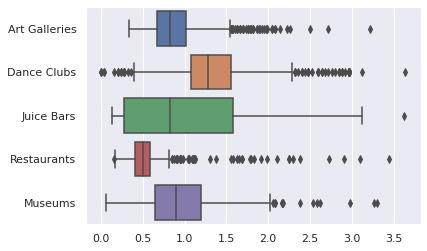

In [ ]:
sns.boxplot(data=dataset[['Art Galleries', 'Dance Clubs', 'Juice Bars', 'Restaurants', 'Museums']], orient='h');

Dilakukan pengecekan data outlier kembali menggunakan boxplot, pada kelima data kategori menunjukkan adanya titik titik diluar kotak boxplot sehingga teridentifikasi adanya outlier pada data.

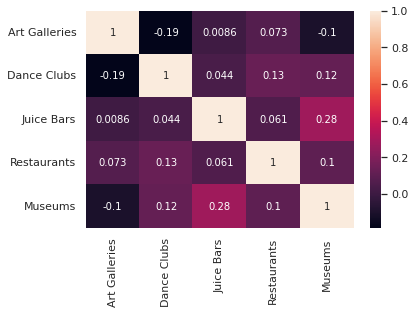

In [ ]:
%matplotlib inline
correlation = data_clustering3.corr()
sns.heatmap(correlation,annot=True)

Selanjutnya akan dicek kembali multikolinearitas pada data dengan menggunakan data_clstering3. Berdasarkan output yang diperoleh didapatkan keseluruhan korelasi variabel memiliki nilai < 0,7 sehingga dapat disimpulkan bahwa asumsi no multikolinearitas pada data_clstering3 terpenuhi.

### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
bestsilhoutte = 0

In [ ]:
for num_clusters in range_n_clusters:

 # initialise KMeans
 kmeans = KMeans(init="random", n_clusters=num_clusters, n_init=10, max_iter=300,random_state=42)
 #fit the clusters
 kmeans.fit(data_clustering3)
 clusters = kmeans.labels_
 print(num_clusters)

 # silhouette score
 score = silhouette_score(data_clustering3, clusters, metric='euclidean')
 print('Silhouetter Score: %.3f' % score)
 silhouette_avg.append(score)

 if score > bestsilhoutte:
   bestclusters = clusters
   bestsilhoutte = score

2
Silhouetter Score: 0.374
3
Silhouetter Score: 0.255
4
Silhouetter Score: 0.268
5
Silhouetter Score: 0.254
6
Silhouetter Score: 0.255
7
Silhouetter Score: 0.269
8
Silhouetter Score: 0.227


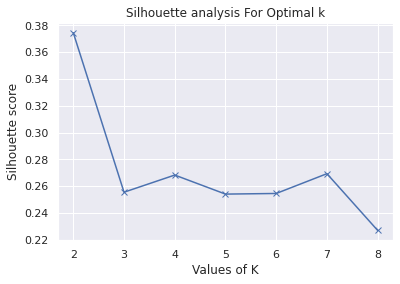

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

Selanjutnya dilakukan clustering data dengan metode K-Means cluster, cluster yang akan dibuat sebanyak 7 cluster yang meliputi cluster 2 sampai 8 serta akan dicari nilai silhouette masing masing cluster. Didapatkan nilai silhouette terbaik yaitu pada 2 cluster dengan nilai silhouette
sebesar 0,374.


In [ ]:
data_result_kmeans = data_clustering3.copy()
data_result_kmeans['cluster'] = bestclusters
data_result_kmeans

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,cluster
User ID,,,,,,
10001,0.93,1.80,2.29,0.62,0.80,0
10002,1.02,2.20,2.66,0.64,1.42,0
10003,1.22,0.80,0.54,0.53,0.24,1
10004,0.45,1.80,0.29,0.57,0.46,1
10005,0.51,1.20,1.18,0.57,1.54,0
...,...,...,...,...,...,...
10976,0.74,1.12,0.30,0.53,0.88,1
10977,1.25,0.92,1.12,0.38,0.78,1
10978,0.61,1.32,0.67,0.43,1.30,1


In [ ]:
data_result_kmeans['cluster'].value_counts()

1    609
0    371
Name: cluster, dtype: int64

Text(0.5, 1.0, 'Art Galleries each Cluster')

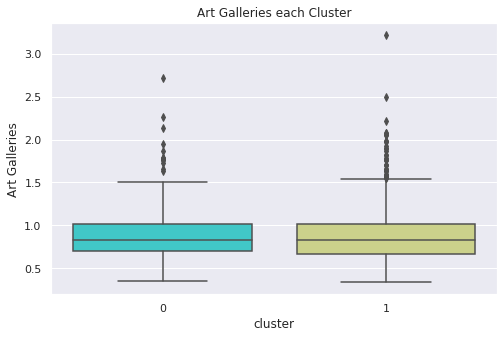

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='Art Galleries',data=data_result_kmeans, palette='rainbow')
plt.title("Art Galleries each Cluster")

Selanjutnya akan dibuat boxplot pada masing masing kategori untuk melihat adanya perbedaan diantara kedua cluster. Berdasarkan output yang didapatkan pada kategori Art and Galeries untuk kedua cluster relatif sama serta pada masing masing cluster memiliki data outlier.


Text(0.5, 1.0, 'Dance Clubs each Cluster')

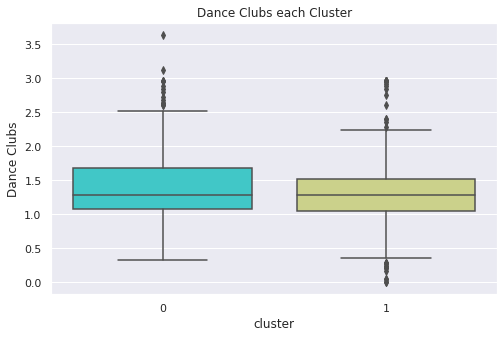

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='Dance Clubs',data=data_result_kmeans, palette='rainbow')
plt.title("Dance Clubs each Cluster")

Berdasarkan output yang didapatkan pada kategori Dance Clubs untuk kedua cluster relatif sama, namun pada cluster 0 memiliki lebar boxplot yang lebih besar dari cluster 1 serta pada masing-masing cluster memiliki data outlier.


Text(0.5, 1.0, 'Juice Bars each Cluster')

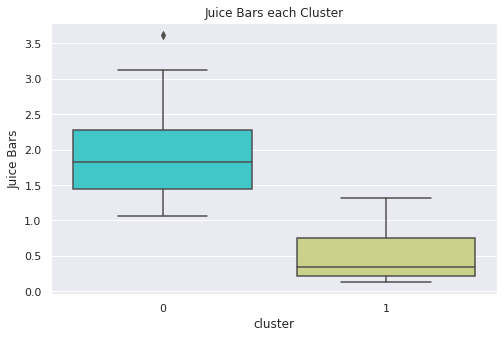

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='Juice Bars',data=data_result_kmeans, palette='rainbow')
plt.title("Juice Bars each Cluster")

Berdasarkan output yang didapatkan pada kategori Juice Bars pada cluster 0 memiliki nilai pusat, Q1, dan Q3 yang lebih tinggi dari cluster 1 serta terdapat 1 outlier pada data cluster 0.


Text(0.5, 1.0, 'Restaurants each Cluster')

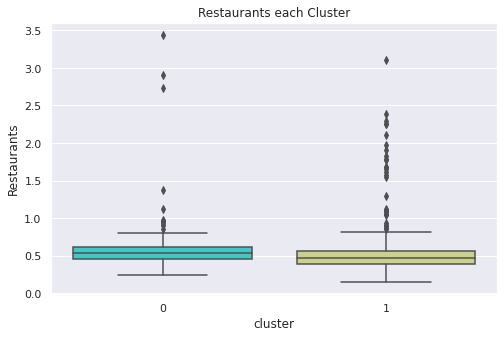

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='Restaurants',data=data_result_kmeans, palette='rainbow')
plt.title("Restaurants each Cluster")

Berdasarkan output yang didapatkan pada kategori Restaurant untuk kedua cluster relatif sama serta pada masing masing cluster memiliki data outlier.


Text(0.5, 1.0, 'Museums each Cluster')

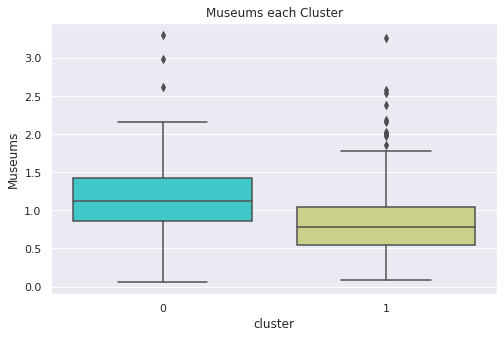

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='Museums',data=data_result_kmeans, palette='rainbow')
plt.title("Museums each Cluster")

Berdasarkan output yang didapatkan pada kategori Museums terlihat pada cluster 0 memiliki nilai Pusat, Q1, dan Q3 yang lebih tinggi dari cluster 1 serta terdapat beberapa outlier pada data cluster 0 maupun cluster 1.

### Partitioning Around Medoids (K-Medoids)

In [ ]:
!pip install scikit-learn-extra

In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
bestsilhoutte = 0

In [ ]:
for num_clusters in range_n_clusters:

 # initialise KMedoids
 kmedoids = KMedoids(n_clusters=num_clusters, random_state=0,method='pam')
 #fit the clusters
 kmedoids.fit(data_clustering3)
 clusters = kmedoids.labels_
 print(num_clusters)

 # silhouette score
 score = silhouette_score(data_clustering3, clusters, metric='euclidean')
 print('Silhouetter Score: %.3f' % score)
 silhouette_avg.append(score)

 if score > bestsilhoutte:
   bestclusters = clusters
   bestsilhoutte = score

2
Silhouetter Score: 0.371
3
Silhouetter Score: 0.253
4
Silhouetter Score: 0.257
5
Silhouetter Score: 0.222
6
Silhouetter Score: 0.208
7
Silhouetter Score: 0.180
8
Silhouetter Score: 0.182


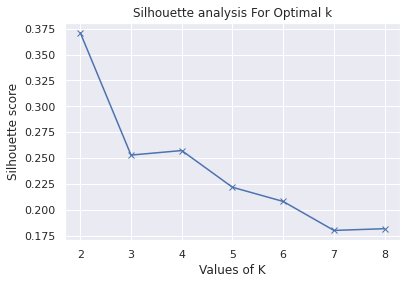

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

Selanjutnya dilakukan clustering data dengan metode K-Medoids cluster, cluster yang akan dibuat sebanyak 7 cluster yang meliputi 2 sampai 8 cluster serta akan dicari nilai silhouette masing masing cluster. Didapatkan nilai silhouette terbaik yaitu pada 2 cluster dengan nilai silhouette sebesar 0,371.


In [ ]:
data_result_kmedoids = data_clustering3.copy()
data_result_kmedoids['cluster'] = bestclusters
data_result_kmedoids

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,cluster
User ID,,,,,,
10001,0.93,1.80,2.29,0.62,0.80,0
10002,1.02,2.20,2.66,0.64,1.42,0
10003,1.22,0.80,0.54,0.53,0.24,1
10004,0.45,1.80,0.29,0.57,0.46,1
10005,0.51,1.20,1.18,0.57,1.54,0
...,...,...,...,...,...,...
10976,0.74,1.12,0.30,0.53,0.88,1
10977,1.25,0.92,1.12,0.38,0.78,1
10978,0.61,1.32,0.67,0.43,1.30,1


In [ ]:
data_result_kmedoids['cluster'].value_counts()

1    596
0    384
Name: cluster, dtype: int64

Text(0.5, 1.0, 'Art Galleries each Cluster')

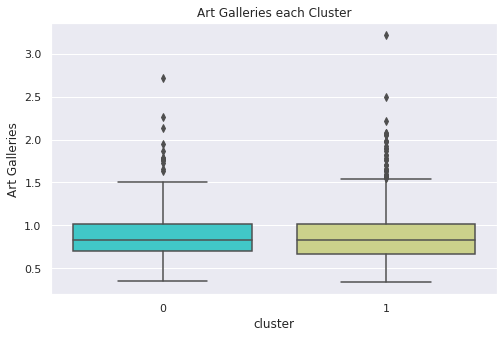

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='Art Galleries',data=data_result_kmedoids, palette='rainbow')
plt.title("Art Galleries each Cluster")

Selanjutnya akan dibuat boxplot pada masing masing kategori untuk melihat adanya perbedaan  diantara kedua cluster. Berdasarkan output yang didapatkan pada kategori Art Galleries untuk kedua cluster relatif sama serta pada masing masing cluster memiliki data outlier.


Text(0.5, 1.0, 'Dance Clubs each Cluster')

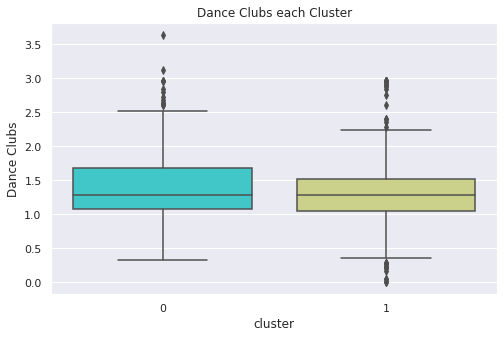

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='Dance Clubs',data=data_result_kmedoids, palette='rainbow')
plt.title("Dance Clubs each Cluster")

Berdasarkan output yang didapatkan pada kategori Dance Clubs untuk kedua cluster relatif sama,namun pada cluster 0 memiliki lebar boxplot yang lebih besar dari cluster 1 serta pada masing-masing cluster memiliki data.outlier.


Text(0.5, 1.0, 'Juice Bars each Cluster')

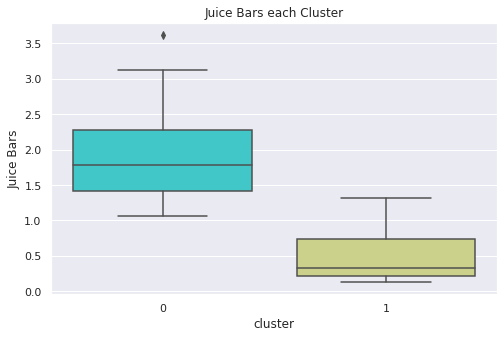

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='Juice Bars',data=data_result_kmedoids, palette='rainbow')
plt.title("Juice Bars each Cluster")

Berdasarkan output yang didapatkan pada kategori Juice Bars pada cluster 0 memiliki nilai Pusat, Q1, dan Q3 yang lebih tinggi dari cluster 1 serta terdapat 1 data outlier pada data cluster 0. Selain itu mean data pada cluster 1 tampak lebih dekat dengan Q1 yang menandakan bahwa distribusi tidak normal.


Text(0.5, 1.0, 'Restaurants each Cluster')

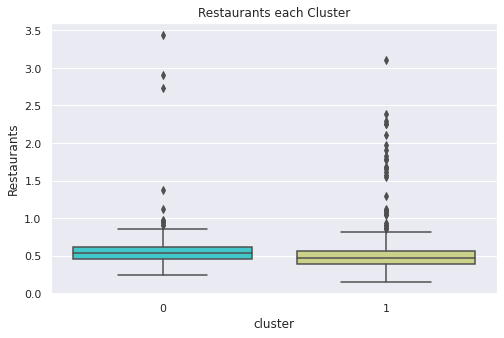

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='Restaurants',data=data_result_kmedoids, palette='rainbow')
plt.title("Restaurants each Cluster")

Berdasarkan output yang didapatkan pada kategori Restaurant untuk kedua cluster relatif sama serta pada masing masing cluster memiliki data outlier. Nilai outlier dari data cluster 1 cenderung lebih banyak daripada outlier pada cluster 0.


Text(0.5, 1.0, 'Museums each Cluster')

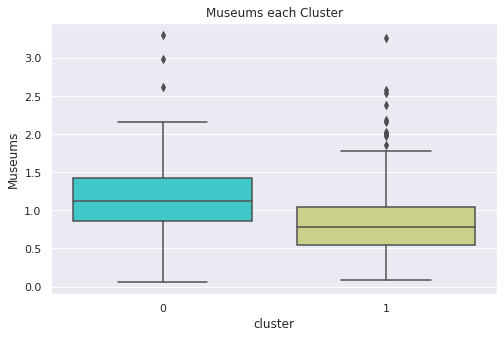

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='Museums',data=data_result_kmedoids, palette='rainbow')
plt.title("Museums each Cluster")

Berdasarkan output yang didapatkan pada kategori Museums pada cluster 0 memiliki nilai Pusat, Q1, dan Q3 yang lebih tinggi dari cluster 1 serta terdapat beberapa data outlier pada data cluster 0 maupun cluster 1.

# Kesimpulan

Berdasarkan analisis clustering yang telah dilakukan didapatkan pada clustering K-Means nilai silhouette yang terbaik adalah 2 cluster dengan nilai 0,374, pada clustering K-Medoids didapatkan nilai silhouette terbaik yaitu pada 2 cluster dengan nilai silhouette sebesar 0,371. Oleh karena itu berdasarkan nilai silhouette yang didapatkan pada kedua metode, metode clustering yang paling baik digunakan untuk dataset ini adalah metode K-Means Cluster karena memiliki nilai silhouette lebih tinggi dari metode K-Medoids dengan nilai silhouette sebesar 0,374 serta akan dibentuk 2 cluster dengan cluster 1 sebanyak 609 data dan cluster 0 sebanyak 371 data.

Berdasarkan hasil analisis telah didapatkan metode clustering terbaik yaitu metode K-Means cluster. Saran yang dapat kami berikan yaitu karena user telah di cluster sesuai dengan rating yang telah diberikan pada beberapa destinasi, hasil clustering ini dapat digunakan sebagai rekomendasi untuk menentukan destinasi yang cocok dikunjungi oleh masing masing user
sehingga user dapat mempersiapkan perjalanan agar lebih efektif.
